# Data-driven predictive model for cooling tower performance

<u>Objective: </u> Create a data-driven predictive model based on time-series for the cooling tower efficiency. <br/>

<u>Abstract of the project:</u>
Heating Ventilation and Air Conditioning systems (HVACs) are used to control temperature and humidity inside buildings. They use cooling towers at one end to expel excess heat from the refrigerant into the atmosphere. The heat is expelled through evaporative cooling. <br/>
Cooling towers are used to expel heat from warm water coming out of water-cooled condensers in chiller units. The water has absorbed heat from the chiller’s refrigerant as it condenses. The rate of cooling depends on the cooling tower surface area, humidity, temperature, and speed of water and air. Cooling tower efficiency can be expressed as
$$
μ = (\frac{t_i  - t_o }{t_i  - t_w) })*100
$$
where
μ = cooling tower efficiency (%) <br/>
t_i  = inlet temperature of water to the tower ( o C,  o F) <br/>
t_o  = outlet temperature of water from the tower ( o C,  o F) <br/>
t_w  = wet bulb temperature of air ( ^o C,  ^o F) <br/>

The temperature difference between inlet and outlet water (t_i  - t_o ) is normally in the range 10 - 15  o F. The units should be consistent for the temperature.


## Load data

In [1]:
import pandas as pd

df = pd.read_csv('data/2621_Cooling_Tower_1.csv', index_col='time')
df.head()

,Cell_1bFan fanOnOff,Cell_1bFan fanStatus,Cell_1bFan vfdPercent,Cell_1bFan vfdPower,Cell_1aFan fanOnOff,Cell_1aFan fanStatus,Cell_1aFan vfdPercent,Cell_1aFan vfdPower,ESB_Tower_1 basinHeaterAlarm,ESB_Tower_1 bypassValveOpenClose,...,ESB_Tower_1 leavingWaterFlow,ESB_Tower_1 leavingWaterTemp,ESB_Tower_1 lowWaterLevelAlarm,ESB_Tower_1 makeupWaterConductivity,ESB_Tower_1 makeupWaterFlow,ESB_Tower_1 outdoorAirDryBulb,ESB_Tower_1 outdoorAirHumidity,ESB_Tower_1 outdoorAirWetBulb,ESB_Tower_1 waterConductivity,ESB_Tower_1 waterLevel
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 06:00:00+00:00,False,False,99.589935,NaN,False,False,99.589935,NaN,NaN,True,...,NaN,67.951897,NaN,NaN,NaN,55.596096,76.821442,51.510937,NaN,NaN
2019-01-01 06:05:00+00:00,False,False,99.589935,NaN,False,False,99.589935,NaN,NaN,True,...,NaN,67.951897,NaN,NaN,NaN,55.596096,77.292564,51.535805,NaN,NaN
2019-01-01 06:10:00+00:00,False,False,99.589935,NaN,False,False,99.589935,NaN,NaN,True,...,NaN,67.951897,NaN,NaN,NaN,55.596096,75.833458,51.318092,NaN,NaN
2019-01-01 06:15:00+00:00,False,False,99.589935,NaN,False,False,99.589935,NaN,NaN,True,...,NaN,67.951897,NaN,NaN,NaN,55.596096,75.666313,51.256962,NaN,NaN
2019-01-01 06:20:00+00:00,False,False,99.589935,NaN,False,False,99.589935,NaN,NaN,True,...,NaN,67.951897,NaN,NaN,NaN,55.596096,77.656372,51.601902,NaN,NaN


## Missing data imputation

In [2]:
# look at amount of missing data in each column
df.apply(pd.isnull).sum()/df.shape[0]

Cell_1bFan fanOnOff                            0.0
Cell_1bFan fanStatus                           0.0
Cell_1bFan vfdPercent                          0.0
Cell_1bFan vfdPower                            1.0
Cell_1aFan fanOnOff                            0.0
Cell_1aFan fanStatus                           0.0
Cell_1aFan vfdPercent                          0.0
Cell_1aFan vfdPower                            1.0
ESB_Tower_1 basinHeaterAlarm                   1.0
ESB_Tower_1 bypassValveOpenClose               0.0
ESB_Tower_1 coolingTowerEnable                 0.0
ESB_Tower_1 coolingTowerEnableTempSetPoint     1.0
ESB_Tower_1 coolingTowerLockoutTempSetPoint    1.0
ESB_Tower_1 enteringWaterFlow                  1.0
ESB_Tower_1 enteringWaterTemp                  0.0
ESB_Tower_1 highWaterLevelAlarm                1.0
ESB_Tower_1 leavingWaterFlow                   1.0
ESB_Tower_1 leavingWaterTemp                   0.0
ESB_Tower_1 lowWaterLevelAlarm                 1.0
ESB_Tower_1 makeupWaterConducti

Columns are either completely full or completely empty. So we can drop all empty columns.

In [3]:
df.dropna(axis=1, how="all", inplace=True)

In [4]:
# fix data types
df.index = pd.to_datetime(df.index, utc='True')
df.dtypes

Cell_1bFan fanOnOff                    bool
Cell_1bFan fanStatus                   bool
Cell_1bFan vfdPercent               float64
Cell_1aFan fanOnOff                    bool
Cell_1aFan fanStatus                   bool
Cell_1aFan vfdPercent               float64
ESB_Tower_1 bypassValveOpenClose       bool
ESB_Tower_1 coolingTowerEnable         bool
ESB_Tower_1 enteringWaterTemp       float64
ESB_Tower_1 leavingWaterTemp        float64
ESB_Tower_1 outdoorAirDryBulb       float64
ESB_Tower_1 outdoorAirHumidity      float64
ESB_Tower_1 outdoorAirWetBulb       float64
dtype: object

All data types are correct already.

## Exploratory data analysis
Visualization and outlier removal

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
df.describe()

,Cell_1bFan vfdPercent,Cell_1aFan vfdPercent,ESB_Tower_1 enteringWaterTemp,ESB_Tower_1 leavingWaterTemp,ESB_Tower_1 outdoorAirDryBulb,ESB_Tower_1 outdoorAirHumidity,ESB_Tower_1 outdoorAirWetBulb
count,103915.000000,103915.000000,103915.000000,103915.000000,103915.000000,103915.000000,103915.000000
mean,35.697364,35.697717,72.212080,69.485519,63.384678,62.180180,55.167784
std,46.703482,46.703268,7.214412,5.226963,17.696170,19.742004,14.895606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,67.733768,66.164246,48.980747,46.242802,43.115774
50%,0.000000,0.000000,70.858467,68.119827,64.833214,62.475151,57.063919
75%,100.000000,100.000000,77.584534,73.793045,77.360619,78.438663,69.104118
max,100.000000,100.000000,91.269211,89.454002,100.139587,98.166000,81.819206


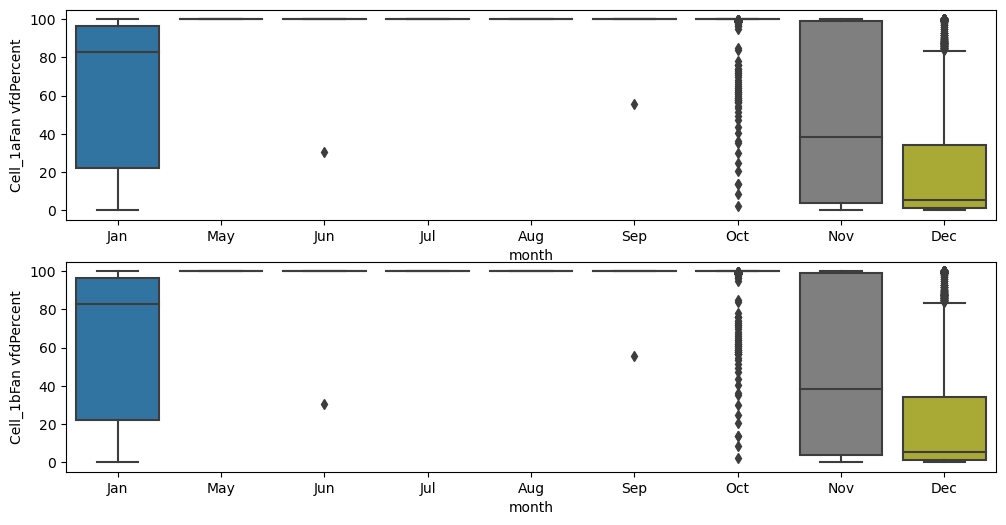

In [7]:
df['month'] = df.index.strftime('%b')

fig, ax = plt.subplots(2)
fig.set_size_inches((12,6))
sns.boxplot(x='month',y='Cell_1aFan vfdPercent', data=df.loc[df['Cell_1aFan fanOnOff'] == True],ax=ax[0])
sns.boxplot(x='month',y='Cell_1bFan vfdPercent', data=df.loc[df['Cell_1bFan fanOnOff'] == True],ax=ax[1])
plt.show()

The data for Cell_1aFan and Cell_1bFan seems identical, which makes sense because both are powered by the same input. <br/>
There appears to be an outlier in June and in September.

In [8]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

print(find_outliers_IQR(df.loc['2019-06','Cell_1aFan vfdPercent'].loc[df['Cell_1aFan fanOnOff'] == True]))
print(find_outliers_IQR(df.loc['2019-06','Cell_1bFan vfdPercent'].loc[df['Cell_1bFan fanOnOff'] == True]))

time
2019-06-16 16:45:00+00:00    30.555557
Name: Cell_1aFan vfdPercent, dtype: float64
time
2019-06-16 16:45:00+00:00    30.555557
Name: Cell_1bFan vfdPercent, dtype: float64


In [9]:
df = df[df.index != '2019-06-16 16:45:00+00:00']

### Efficiency
Compute the cooling tower efficiency as a performance metric for the system and analyze the behavior (smoothness, noise, continuity, multimodality, and monotonicity)

In [10]:
df['efficiency'] = abs((df['ESB_Tower_1 enteringWaterTemp'] - df['ESB_Tower_1 leavingWaterTemp'])/(df['ESB_Tower_1 enteringWaterTemp'] -  df['ESB_Tower_1 outdoorAirWetBulb']) * 100.0)

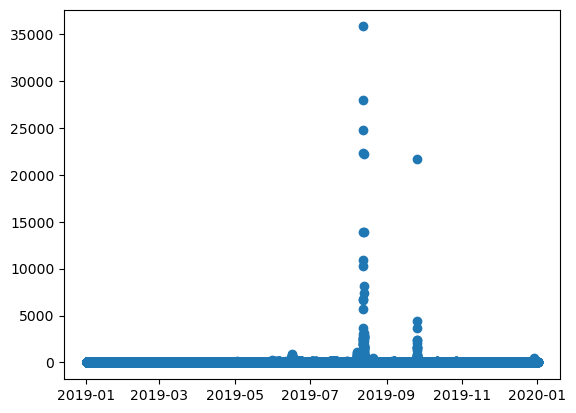

In [11]:
plt.plot_date(df.index, df.efficiency)
plt.show()